# Lecture 7 Application & Tips:
## Learning rate, data preprocessing, overfitting
---

## Gradient descent
- Step : $\alpha \times derivative = -\alpha \times \Delta \mathcal{L}(w_1, w_2)$
- $\alpha$ : learning rate

### Large learning rate: overshooting
- if $\alpha$ is too big : stepsize 가 너무 커져서 곡선밖으로 튕겨 나감 ( 발산 )
- 학습이 이뤄지지도 않고, cost 출력시 숫자가 아닌 값이 나오게됨

![](./img/07-tips-01.png?raw=true =50x)

### Small learning rate: 
- if $\alpha$ is too small : takes too long, stops at local minimum
- cost 의 변화가 작으면 의심

<img src="./img/07-tips-02.png?raw=true", width=300>


### Try several learning rates
- Observe the cost function
- Check it goes down in a reasonable rate ( first trial is almost 0.01 )

## Data $X$ preprocessing for gradient descent
- 전처리 작업의 필요성

<img src="./img/07-tips-03.png", width=300>

### If feature 들이 스케일이 다른 경우
- 이런 경우 learning rate 를 좋게 설정하여도 조금이라도 밖으로 나가게 되면 발산해버릴 가능성 높아짐
<img src="./img/07-tips-04.png", width=300>


### Normalize
- zero-centered data : 데이터의 중심이 0으로 가도록 위치 이동
- normalized data : 데이터의 분포를 표준화
<img src="./img/07-tips-05.png", width=300>

### Standardization
$$x_j^{'} = \frac{x_j-\mu_j}{\sigma_j} $$

`X_std[:,0] = (X[:,0] - x[:,0].mean()) / x[:,0].std()`

## Overfitting
- Our model is very good with training data set ( with memoriation )
- Not good at test dataset or in real use
- Simple is the best ! ( 더 일반적이고, 더 심플한 모델이 좋다 )

<img src="./img/07-tips-06.png", width=300>

### Solutions for overfitting
- More training data
- Reduce the number of features
- **Regularization**

### Regularization
- Let's not have too big numbers in the weight
 - weight 값이 클수록 decision boundary 가 구부러짐
 - 따라서 weight 값을 줄여 decision boundary 를 피겠음
- $Cost~function$ 뒤에 $Regularization$ term 을 추가
 - $\lambda \sum W^2$ term 을 추가함으로써 weight 값이 커지는 것에 대해 패널티를 부여
 - $\lambda$ 가 클수록 패널티를 더 주겠다. ( 0 이면 regularization 하지 않는다 )
$$ \mathcal{L} = \frac{1}{N} \sum (S(WX_i+b), L_i) + \lambda \sum W^2$$

`l2reg = 0.001 * tf.reduce_sum(tf.square(W))`

## Evaluation using training set ?
- 100% correct ( accurary )
- can memorize

### Training and test sets
- training set : modeling
- test set : evaluation

### Cross Validation
- Training, validation and test sets
<img src="./img/07-tips-07.png", width=300>

## Online learning
- training set 이 100만개일 경우, 10만개씩 학습시킨다.
- 첫 번째 학습된 결과가 model 에 남아있고, 두 번째, 세 번째 ... 계속 모델에 학습시키며 결과가 추가로 누적된다.

## Accuracy
- $Y$ 와 $\hat{Y}$ 를 비교
- How many of your predictions are correct ?
 - 95% ~ 99% ( 최근 이미지 분류에서의 정확도 )

# Lab 7. Learning rate, Evaludation
---
https://github.com/aymericdamien/TensorFlow-Examples

### Learning rate 변화에 따른 cost 확인

In [1]:
import tensorflow as tf
import numpy as np

xy = np.loadtxt('./data/train_softmax.txt', unpack=True, dtype='float32')
x_data = np.transpose(xy[0:3])
y_data = np.transpose(xy[3:])

# tf Graph Input
X = tf.placeholder("float", [None, 3])
y = tf.placeholder("float", [None, 3])

# Set model weights
W = tf.Variable(tf.zeros([3, 3]))

# Construct model
hypothesis = tf.nn.softmax(tf.matmul(X, W))

# Minimize error using cross entropy
learning_rate = 10 # 10(발산), 0.0001(느림), 0.1(적절)

# Cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hypothesis)))

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Init
init = tf.global_variables_initializer()

# Launch
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(3001):
        sess.run(optimizer, feed_dict={X:x_data, y:y_data})
        if step % 500 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, y:y_data}), sess.run(W))

0 nan [[ -6.66666555   3.33333278   3.33333158]
 [ 13.33333492  23.33333969 -36.66667175]
 [ 13.33333015  33.33333588 -46.66667175]]
500 nan [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]
1000 nan [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]
1500 nan [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]
2000 nan [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]
2500 nan [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]
3000 nan [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]


## MNIST Dataset

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Epoch: 0001 cost= 0.521184075
Epoch: 0002 cost= 0.352721655
Epoch: 0003 cost= 0.324347386
Epoch: 0004 cost= 0.309409741
Epoch: 0005 cost= 0.299948791
Epoch: 0006 cost= 0.292841051
Epoch: 0007 cost= 0.287805100
Epoch: 0008 cost= 0.283612154
Epoch: 0009 cost= 0.279901834
Epoch: 0010 cost= 0.277078112
Epoch: 0011 cost= 0.274264897
Epoch: 0012 cost= 0.272270089
Epoch: 0013 cost= 0.270249646
Epoch: 0014 cost= 0.268520368
Epoch: 0015 cost= 0.266950446
Epoch: 0016 cost= 0.265373173
Epoch: 0017 cost= 0.264225316
Epoch: 0018 cost= 0.263004799
Epoch: 0019 cost= 0.261592670
Epoch: 0020 cost= 0.260672514
Epoch: 0021 cost= 0.259571604
Epoch: 0022 cost= 0.258678591
Epoch: 0023 cost= 0.257687633
Epoch: 0024 cost= 0.257183725
Epoch: 0025 cost= 0.256372356
Optimization Finished!
Label: [7]
Prediction:  [2]


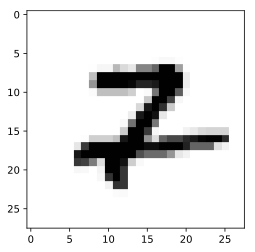

Accuracy: 0.9237


In [3]:
# tf Graph Input
X = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
activation = tf.nn.softmax(tf.matmul(X, W) + b) # Softmax

# Minimize error using cross entropy
learning_rate = 0.1
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(activation), reduction_indices=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Set epoch, step, batch size
training_epochs = 25
display_step = 1
batch_size = 100

# Init
init = tf.global_variables_initializer()

# Training cycle
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        # Loop over all batchs
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(optimizer, feed_dict={X:batch_xs, y:batch_ys})
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={X:batch_xs, y:batch_ys}) / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", "%04d" % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
    print("Optimization Finished!")
    
    # Get on and predict
    r = np.random.randint(0, mnist.test.num_examples -1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction: ", sess.run(tf.argmax(activation,1), {X: mnist.test.images[r:r+1]}))

    # Show the img
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X:mnist.test.images, y:mnist.test.labels}))

### Reading data and set variables

```
# tf Graph Input
X = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [none, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Varaiable(tf.zeros([10]))
```

### Activation ( hypothesis ) and cost

```
# Construct model
activation = tf.nn.softmax(tf.matmul(X, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(activation), reduction_indices=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
```

### Training batch

```
# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(mnist.train.num_examples/batch_size)
    #Loop over all batches
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Fit training using batch data
        sess.run(optimizer, feed_dict={X: batch_xs, y: batch_ys})
        # Compute average loss
        avg_cost += sess.run(cost, feed_dict={X: batch_xs, y: batch_ys}) / total_batch
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", "%04d" % (epoch+1), "cost=", "{:.0f}".format(avg_cost))
print("Opitmization Finished!")
```

### Predict & Show

```
# Get one and predict
r = randint(0, mnist.test.num_examples -1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction: ", sess.run(tf.argmax(activation,1), {X: mnist.test.images[r:r+1]}))

# Show the img
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()
```

### Evaluation
```
# Test model
correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cost(correct_prediction, "float"))
print("Accuracy:", accuracy.eval({X: mnist.test.images, y: mnist.test.labels}))
```